In [0]:

import numpy as np
import parser
import matplotlib.pyplot as plt

In [0]:
import pandas as pd
import time

In [0]:
bikes = pd.read_csv ('https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv', parse_dates=[0], index_col ="Date")

In [0]:
bikes.sort_values (by= 'Date', ascending=True).head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [0]:
bikes.dropna().describe()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,61287.000000,61287.000000
mean,52.894790,61.444874
std,67.815951,89.875981
min,0.000000,0.000000
25%,7.000000,7.000000
50%,29.000000,30.000000
75%,71.000000,74.000000
max,698.000000,850.000000


In [0]:
bikes.dtypes

Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
dtype: object

In [0]:
bikes.columns = ['Date', 'East', 'West']
bikes['Total'] = bikes.eval('East + West')

ValueError: ignored

In [0]:
bikes.head(5)

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2015-02-24 02:00:00,3.0,3.0
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2016-02-15 00:00:00,3.0,3.0
2019-01-01 02:00:00,1.0,11.0


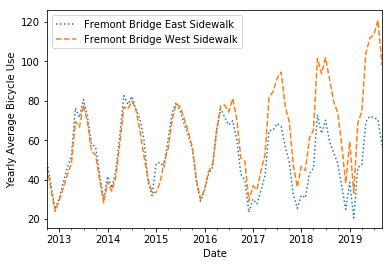

In [0]:
monthly = bikes.resample('M').mean()
monthly.plot(style=[':', '--', '-'])
plt.ylabel('Yearly Average Bicycle Use');

In [0]:
new = bikes.groupby(by='Date' ).mean()
new.head(2)



,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0


In [0]:
monthly= bikes.to_period('M').sort_values(by= 'Date', ascending=True)
month= monthly.groupby('Date').mean()
month.head()
#monthly.sort_index(axis=0)
#yearly.groupby(by='Date' ).mean()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10,48.511494,45.877874
2012-11,36.197222,34.145833
2012-12,25.010753,23.872312
2013-01,30.793011,29.534946
2013-02,38.538690,35.906250


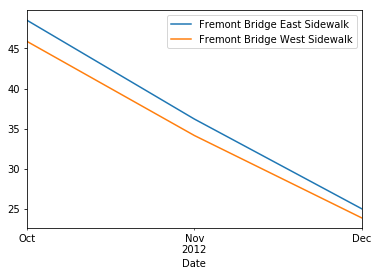

In [0]:
twenty_twelve= month['2012-10':'2012-12']
twenty_twelve.plot()

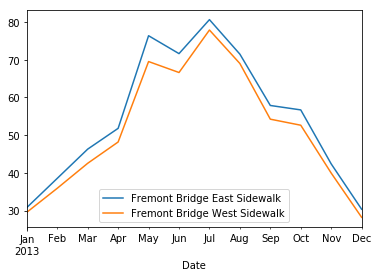

In [0]:
twenty_thirteen=month['2013-01':'2013-12']
twenty_thirteen.plot()


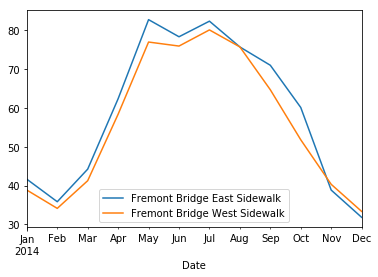

In [0]:
twenty_fourteen=month['2014-01':'2014-12']
twenty_fourteen.plot()

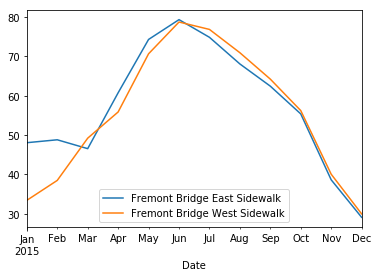

In [0]:
twenty_fifteen=month['2015-01':'2015-12']
twenty_fifteen.plot()

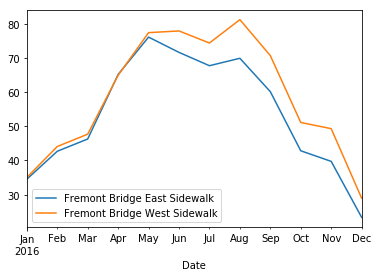

In [0]:
twenty_sixteen=month['2016-01':'2016-12']
twenty_sixteen.plot()

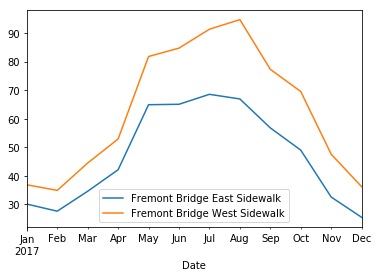

In [0]:
twenty_seventeen=month['2017-01':'2017-12']
twenty_seventeen.plot()

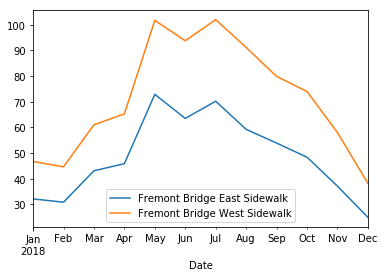

In [0]:
twenty_eightteen=month['2018-01':'2018-12']
twenty_eightteen.plot()

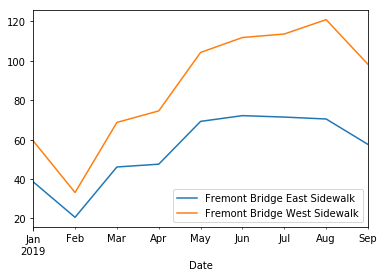

In [0]:
twenty_nineteen=month['2019-01':'2019-09']
twenty_nineteen.plot()

In [0]:
daily= bikes.to_period('H').sort_values(by= 'Date', ascending=True)
dail= daily.groupby('Date').mean()
dail.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00,4.0,9.0
2012-10-03 01:00,4.0,6.0
2012-10-03 02:00,1.0,1.0
2012-10-03 03:00,2.0,3.0
2012-10-03 04:00,6.0,1.0


In [0]:
hours= dail.head(168)

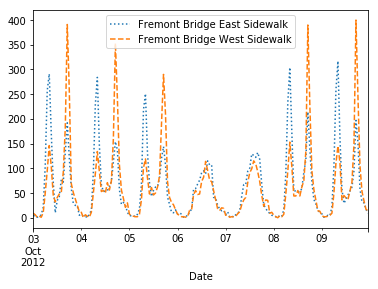

In [0]:
hours.groupby('Date').mean().plot(style=[':', '--', '-']);
 #Done by slicing a section of the entire data set and then utilizing the data of 7 days (including all the hours) to make the graph
 #Innacurate representation because I took the average of the first week, not of the populaiton
 #Technically, this is all the hours in a week, but how do i make it more accurate?

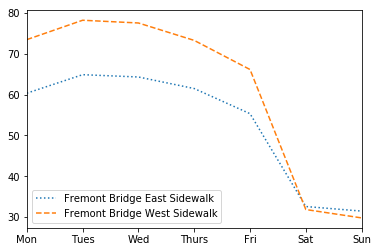

In [0]:
weekday= bikes.groupby(bikes.index.weekday).mean()
weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
weekday.plot(style=[':', '--', '-']);
#Done by utilizing the function to average the weekdays but had difficulty combining it with hours

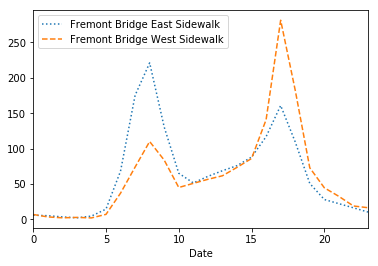

In [0]:
hours.groupby(hours.index.hour).mean().plot(style=[':', '--', '-']);
#Done by utilizing the function to average the hours in a day but could not do this over a 7 day period, like in the slicing 

In [0]:
nineteen=bikes['2019']

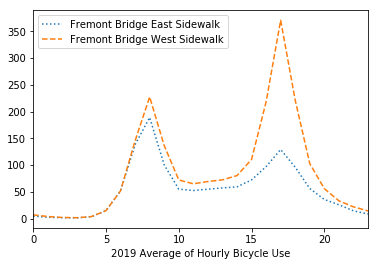

In [0]:
nineteen.groupby(nineteen.index.hour).mean().plot(style=[':', '--', '-']);
plt.xlabel('2019 Average of Hourly Bicycle Use');

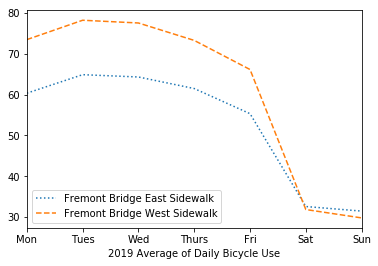

In [0]:
#used the '.index.weekday.mean()' function for the data of 2019 data, but it looks exactly like the population graph. Does it use a default average 
#Or does it calculate it for each data set?
nineteen.groupby(nineteen.index.weekday).mean()
weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
weekday.plot(style=[':', '--', '-']);
plt.xlabel('2019 Average of Daily Bicycle Use');

In [0]:
nineteeen= nineteen.groupby(nineteen.index.weekday).mean()
nineteeen.index=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
#The best day to bike is... 

In [0]:
nineteeen #there is no day 
#None of the days of the week have less than 30 people during the week 

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Mon,62.028846,104.997863
Tues,63.224359,107.617521
Wed,63.908120,108.168803
Thurs,63.495726,106.244658
Fri,56.266026,94.758547
Sat,39.535256,47.792735
Sun,37.901709,44.388889


In [0]:
hours1=nineteen.groupby(nineteen.index.hour).mean() 
hours1
#But when you look at the average of people per hour, now we see that there is less people between 11pm and 4 am .

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
0,4.604396,7.098901
1,2.666667,3.970696
2,1.670330,2.238095
3,1.366300,1.761905
4,3.677656,3.901099
5,15.007326,14.904762
6,51.827839,51.974359
7,138.307692,145.520147
8,189.065934,227.509158


In [182]:
hours_1=hours1[0:5]
hours_1

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
0,4.604396,7.098901
1,2.666667,3.970696
2,1.670330,2.238095
3,1.366300,1.761905
4,3.677656,3.901099


In [0]:
hours_2=hours1[22:25]
hours_2

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
22,14.648352,22.047619
23,8.626374,14.439560


In [0]:
#not sure if we were supposed to plot just the hours or if you wanted us to plot these specific hours for each day in the week
frames= [hours_1,hours_2]
biking_hours= pd.concat(frames)
biking_hours.index=['midnight', '1 am', '2 am', '3 am', '4 am', '10 pm', '11 pm']


In [0]:
biking_hours

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
midnight,4.604396,7.098901
1 am,2.666667,3.970696
2 am,1.670330,2.238095
3 am,1.366300,1.761905
4 am,3.677656,3.901099
10 pm,14.648352,22.047619
11 pm,8.626374,14.439560


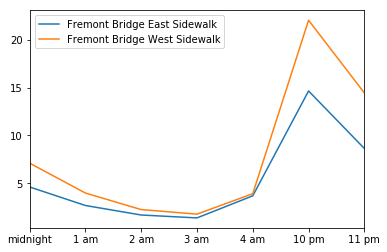

In [0]:
biking_hours.plot()


In [0]:
import pandas as pd
import sqlite3

In [0]:
SELECT city, max (altitude) FROM airports 
#returned: Dauphin, 999 (max altitude)

In [0]:
SELECT city, min (altitude) FROM airports 
#returned: amsterdam, -11 (min altitude)

In [0]:
!wget "https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/flights.db"


--2019-10-20 16:22:32--  https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/flights.db
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vfp1/bts-mbds-data-science-foundations-2019/master/sessions/data/flights.db [following]
--2019-10-20 16:22:34--  https://raw.githubusercontent.com/vfp1/bts-mbds-data-science-foundations-2019/master/sessions/data/flights.db
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5415936 (5.2M) [application/octet-stream]
Saving to: ‘flights.db.1’

flights.db.1        100%[===================>]   5.17M  --.-KB/s    in 0.1s    

2019-10-20 16:

In [0]:
import sqlite3


def create_connect_database(db_name):
    """Opens connection or creates it if it is not existent"""
    connection = sqlite3.connect(db_name)
    cursor = connection.cursor()
    
    return connection, cursor

def commit_close(conn, c, close_connection=True):
    """Commits to connection DB and closes it if close is True"""
    conn.commit()

    if close_connection is True:
        c.close()
        conn.close()
    elif close_connection is False:
        pass

In [176]:
import sqlite3

connection, cursor = create_connect_database('/content/flights.db.1')

cursor.execute("SELECT name FROM SQLite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('airports',), ('airlines',), ('routes',)]


In [177]:
for table in tables:
    print("Table name", table[0])
    cursor.execute('PRAGMA TABLE_INFO({});'.format(table[0]))

    # collect names in a list
    names = [tup[1] for tup in cursor.fetchall()]
    print(names)

Table name airports
['index', 'id', 'name', 'city', 'country', 'code', 'icao', 'latitude', 'longitude', 'altitude', 'offset', 'dst', 'timezone']
Table name airlines
['index', 'id', 'name', 'alias', 'iata', 'icao', 'callsign', 'country', 'active']
Table name routes
['index', 'airline', 'airline_id', 'source', 'source_id', 'dest', 'dest_id', 'codeshare', 'stops', 'equipment']


In [0]:
    #num_rows = cursor.execute('SELECT COUNT(*) FROM {};'.format(table[0]))
    
  #values = num_rows.fetchone()
   # print("Table", table[0], "contains", values[0], "rows")

In [0]:
commit_close(conn=connection, c=cursor, close_connection=True)

In [0]:
import pandas as pd
import sqlite3

connection, cursor = create_connect_database("flights.db.1")



In [190]:
df = pd.read_sql_query("SELECT city, timezone FROM airports;", connection)
df.head()


,city,timezone
0,Goroka,Pacific/Port_Moresby
1,Madang,Pacific/Port_Moresby
2,Mount Hagen,Pacific/Port_Moresby
3,Nadzab,Pacific/Port_Moresby
4,Port Moresby,Pacific/Port_Moresby


In [195]:
#Retrieve the timezones and generate a dataframe with the timezones and the amount of airports in them

import pandas as pd
import sqlite3

conn, cursor = create_connect_database("flights.db.1")

query = """SELECT timezone, COUNT (name)  FROM airports GROUP BY timezone ORDER BY COUNT(name);"""

timezones = pd.read_sql_query(query, conn)
timezones.head(10)


,timezone,COUNT (name)
0,Africa/Banjul,1
1,Africa/Bujumbura,1
2,Africa/Mbabane,1
3,Africa/Porto-Novo,1
4,America/Anguilla,1
5,America/Aruba,1
6,America/Barbados,1
7,Asia/Thimphu,1
8,Europe/Gibraltar,1
9,Europe/Isle_of_Man,1


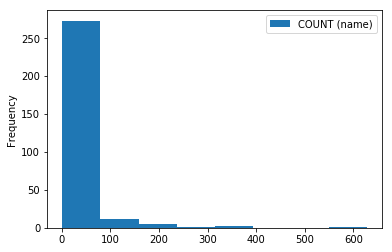

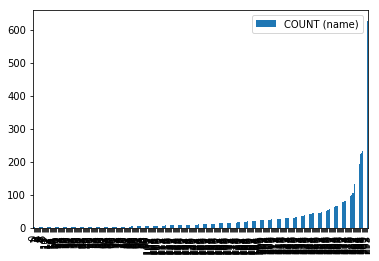

In [207]:
#histogram and bar graph
import matplotlib.pyplot as plt
%matplotlib inline 

timezones.plot.hist(bins=8)
timezones.plot.bar()

In [0]:
#which country has more airlines 
#good ol' USA
import pandas as pd
import sqlite3

conn, cursor = create_connect_database("flights.db.1")

query = """SELECT country, COUNT(country) FROM airlines GROUP BY country ORDER BY COUNT () DESC;"""

airlines_countries=  pd.read_sql_query(query, conn)


In [222]:
airlines_countries.head()

,country,COUNT(country)
0,United States,1080
1,Mexico,439
2,United Kingdom,407
3,Canada,318
4,Russia,230


In [223]:
airlines_countries.max()



COUNT(country)    1080
dtype: int64

In [225]:
airlines_countries.tail()

,country,COUNT(country)
272,UNIFORM OSCAR,1
273,UNited Kingdom,1
274,VELES,1
275,Vanuatu,1
276,WATCHDOG,1


In [218]:
airlines_countries.min()

COUNT(name)    1
dtype: int64

In [0]:
#Which city has the most outgoing destinations? And the least?
conn, cursor = create_connect_database("flights.db.1")
query = """SELECT CAST (airports.city AS TEXT) AS city, COUNT(source) as source_count FROM routes INNER JOIN airports ON routes.source = airports.code 
GROUP BY city ORDER BY source_count DESC;"""

outgoing_dest= pd.read_sql_query(query, conn)


In [231]:
outgoing_dest.head()


,city,source_count
0,London,1232
1,Atlanta,915
2,Paris,725
3,Chicago,697
4,Shanghai,616


In [232]:

outgoing_dest.tail()

,city,source_count
3143,Yasuj,1
3144,Yola,1
3145,Yuzhno-Kurilsk,1
3146,Çorlu,1
3147,Île des Pins,1


In [0]:
#And which city has the most incoming destinations? And the least?
query = """SELECT CAST (airports.city AS TEXT) AS city, COUNT(dest) as destinations_count FROM routes INNER JOIN airports ON routes.dest = airports.code 
GROUP BY city ORDER BY destinations_count DESC"""

incoming_dest= pd.read_sql_query(query, conn)


In [246]:
incoming_dest.head()


,city,destinations_count
0,London,1224
1,Atlanta,911
2,Paris,720
3,Chicago,682
4,Shanghai,620


In [247]:
incoming_dest.tail()

,city,destinations_count
3147,Yuzhno-Kurilsk,1
3148,Zachar Bay,1
3149,Ziguinchor,1
3150,Çorlu,1
3151,Île des Pins,1
